In [1]:
import lane_detection_pipeline as pipeline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(240, 320, 3)


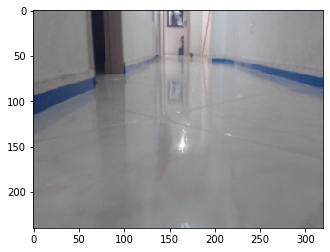

In [3]:
img_lane = cv2.imread('dataSet3/image_1628786135241.jpg')
plt.imshow(cv2.cvtColor(img_lane, cv2.COLOR_BGR2RGB))
print(img_lane.shape)

In [4]:
(height, width) = img_lane.shape[:2]

mid_offset = 80
bottom_offset = 0
x_offset = 0
y_bottom_offset = 140
y_top_offset = 50

mid_y = height // 2
mid_width = width // 2

left_bottom = (0 + bottom_offset + x_offset, height - y_bottom_offset)
right_bottom = (width - bottom_offset + x_offset, height - y_bottom_offset)
apex1 = ( mid_width - mid_offset + x_offset, mid_y - y_top_offset)
apex2 = ( mid_width + mid_offset + x_offset, mid_y - y_top_offset)
corners = [left_bottom, right_bottom, apex2, apex1]

print(corners)

[(0, 100), (320, 100), (240, 70), (80, 70)]


In [5]:
lane_processing = pipeline.LaneDetection(corners)

## Select channel

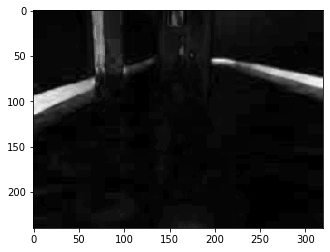

In [6]:
s_channel = lane_processing._select_channel(img_lane)
plt.imshow(s_channel, cmap='gray')

## Binary Operation

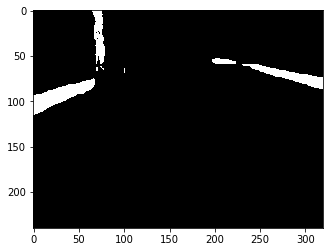

In [7]:
binary_img = lane_processing._binary(s_channel, 80, 255)
plt.imshow(binary_img, cmap='gray')

## Draw polygon region (optional)

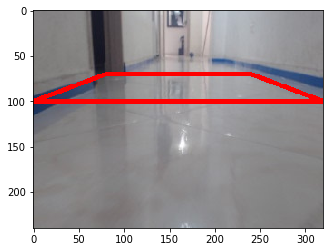

In [8]:
draw_region = pipeline.draw_region(img_lane, corners)
plt.imshow(cv2.cvtColor(draw_region, cv2.COLOR_BGR2RGB))

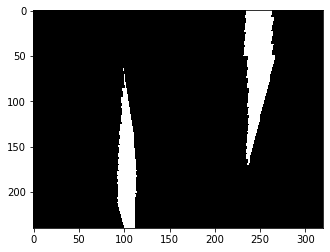

In [9]:
inv_corners = corners[::-1]
bird_view, M = lane_processing._bird_view(binary_img)
plt.imshow(bird_view, cmap='gray')

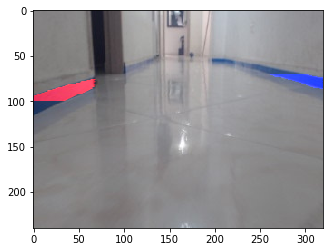

In [10]:
out_img = lane_processing._segmentation_lane_detection(bird_view, img_lane)
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))

## Use complete pipeline in a single function

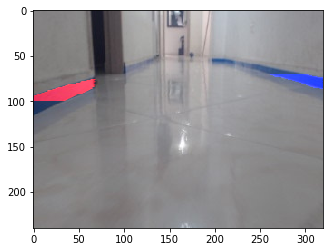

In [11]:
result = lane_processing.process_image(img_lane)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [18]:
images_name = ["image_1628786131241.jpg",
"image_1628786131741.jpg",
"image_1628786132240.jpg",
"image_1628786132741.jpg",
"image_1628786133241.jpg",
"image_1628786133740.jpg",
"image_1628786134241.jpg",
"image_1628786134740.jpg",
"image_1628786135241.jpg",
"image_1628786135740.jpg",
"image_1628786136240.jpg",
"image_1628786136740.jpg",
"image_1628786137240.jpg",
"image_1628786137741.jpg",
"image_1628786138240.jpg",
"image_1628786138741.jpg",
"image_1628786139240.jpg",
"image_1628786139740.jpg",
"image_1628786140240.jpg",
"image_1628786140740.jpg",
"image_1628786141240.jpg",
"image_1628786141740.jpg",
"image_1628786142241.jpg",
"image_1628786214160.jpg",
"image_1628786214662.jpg",
"image_1628786215160.jpg",
"image_1628786215661.jpg",
"image_1628786216161.jpg",
"image_1628786216660.jpg",
"image_1628786217160.jpg",
"image_1628786217660.jpg",
"image_1628786218160.jpg",
"image_1628786218660.jpg",
"image_1628786219160.jpg",
"image_1628786219660.jpg",
"image_1628786220160.jpg",
"image_1628786220661.jpg",
"image_1628786221160.jpg",
"image_1628786221661.jpg",
"image_1628786222161.jpg",
"image_1628786267477.jpg",
"image_1628786267976.jpg",
"image_1628786268477.jpg",
"image_1628786268976.jpg",
"image_1628786269476.jpg",
"image_1628786269977.jpg",
"image_1628786270476.jpg",
"image_1628786270977.jpg",
"image_1628786271476.jpg",
"image_1628786271977.jpg",
"image_1628786272476.jpg",
"image_1628786272977.jpg",
"image_1628786273476.jpg",
"image_1628786273976.jpg",
"image_1628786274477.jpg",
"image_1628786274976.jpg",
"image_1628786275476.jpg",
"image_1628786275977.jpg",
"image_1628786276476.jpg",
"image_1628786276976.jpg",
"image_1628786277476.jpg",
"image_1628786277976.jpg",
"image_1628786278477.jpg",
"image_1628786278976.jpg",
"image_1628786279476.jpg",
"image_1628786313500.jpg",
"image_1628786314000.jpg",
"image_1628786314500.jpg",
"image_1628786315000.jpg",
"image_1628786315499.jpg",
"image_1628786316000.jpg",
"image_1628786316500.jpg",
"image_1628786317000.jpg",
"image_1628786317500.jpg",
"image_1628786317999.jpg",
"image_1628786318500.jpg",
"image_1628786319000.jpg",
"image_1628786319499.jpg",
"image_1628786320000.jpg",
"image_1628786320500.jpg",
"image_1628786320999.jpg",
"image_1628786321500.jpg",
"image_1628786322000.jpg",
"image_1628786322499.jpg",
"image_1628786323000.jpg",
"image_1628786323500.jpg",
"image_1628786324000.jpg",
"image_1628786324500.jpg",
"image_1628786325000.jpg",
"image_1628786325500.jpg",
"image_1628786326000.jpg",
"image_1628786326500.jpg"]

In [21]:
images = []
processed_images = []
for img_name in images_name:
    path = "dataSet3/" + img_name
    load_image = cv2.imread(path)
    images.append(load_image)
    result = lane_processing.process_image(load_image)
    processed_images.append(result)

In [ ]:
n_it = len(images)
plt.figure(figsize=(10, 4*n_it))
for i in range(n_it):
    ax = plt.subplot(n_it, 2, 2*i+1)
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(images_name[i], fontsize=10)
    
    ax = plt.subplot(n_it, 2, 2*(i+1))
    ax.imshow(cv2.cvtColor(processed_images[i], cv2.COLOR_BGR2RGB))